# M2_AI2: Gestión de facturas
#### Autor: Leandro Gutierrez
#### Este documento intenta dar respuesta a la actividad 2 propuesta en el Modulo **Fundamentos de Estadística** del **Master en Big Data y Ciencia de Datos**. En él se describirán cada uno de los enunciados postulados y los resultados obtenidos a través del uso de Python y Google Colab.
#### Junio 12, 2024

## Enunciado
El objetivo de esta actividad consiste en identificar y analizar el total pagado de un dataset de facturas que tiene una compañía. La moneda está en euros.

IMPORTANTE: LA OBTENCIÓN DE LOS RESULTADOS (el dato numérico y el código) SIN LOS COMENTARIOS Y LA JUSTIFICACIÓN ANALÍTICA. NO PUNTÚA NOTA

Con el dataset de la gestión de facturas, debes analizar la variable “total pagado” para poder responder a las siguientes preguntas:

- Parte1: Unidimensional (50%)
1. Hallar las medidas de centralización: media, mediana y moda. Analiza los resultados obtenidos.  
2. Las medidas de dispersión: rango, varianza, desviación típica y coeficiente de variación. Analiza los resultados obtenidos. 
3. Las medidas de posición: rango intercuartílico, cuartil primero y percentil 90. Analiza los resultados obtenidos. 
4. Las medidas de concentración y forma: curtosis, asimetría y el gráfico asociado. Analiza los resultados obtenidos. 
5. Realiza un análisis de todos los datos obtenidos en los apartados anteriores y añade un gráfico de box-plot explicando los resultados.

- Parte2: Análisis de la información de la empresa y su situación  (20%)
1. ANALIZA los resultados e informa de quién es el cliente que ha pagado MÁS en todas las facturas.
2. ANALIZA los resultados e informa de quién es el cliente que ha pagado MENOS facturas en el mes de febrero.
3. Añadir un gráfico de box-plot de los clientes. Conclusiones y recomendaciones después de todo el análisis realizado.


- Parte3: Análisis Bidimensional (15%)
1. Crea un gráfico de dispersión que represente el total pagado de las facturas respecto del IVA aplicado. Explica el resultado obtenido.
2. Determina el valor de la covarianza de ambas variables. Analiza el dato resultante obtenido.
3. ¿Se podría hacer un modelo predictivo? ¿porque?


- Parte 4: Análisis Global. (15%)
1. ANALIZA toda la información obtenida. ¿Cuál sería la recomendación que darías para la toma de decisión en la compañía?

## Solución

### Diccionario de datos

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
    <td>id</td>
    <td>Identificador correlativo y secuencial del número de registros de facturas.</td>
    <td></td>
</tr>
<tr>
    <td>fecha</td>
    <td>Fecha en la que se generó la factura.</td>
    <td></td>
</tr>
<tr>
    <td>mes</td>
    <td>Mes en la que se generó la factura</td>
    <td></td>
</tr>
<tr>
    <td>cliente</td>
    <td>Tipo de cliente, clasificado de la A a la D</td>
    <td>ClienteA - ClienteB - ClienteC - ClienteD</td>
</tr>
<tr>
    <td>factura_pagada</td>
    <td>Descriptivo de si está pagada o no, en la fecha de generación.</td>
    <td>si - no</td>
</tr>
<tr>
    <td>importe_factura</td>
    <td>Importe neto sin el IVA.</td>
    <td></td>
</tr>
<tr>
    <td>tio_IVA</td>
    <td>Es el tipo de impuesto aplicado (descriptivo).</td>
    <td>normal - reducido</td>
</tr>
<tr>
    <td>porcentaje_IVA</td>
    <td>Es el porcentaje aplicado.</td>
    <td></td>
</tr>
<tr>
    <td>IVA</td>
    <td>Es el valor numérico del porcentaje correspondiente a la factura.</td>
    <td></td>
</tr>
<tr>
    <td>total_pagado</td>
    <td>es el importe bruto de la factura (el neto más el importe IVA).</td>
    <td></td>
</tr>
</tbody>
</table>


### Carga del dataset

In [1]:
# importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# definición de la url de los datos
url = 'https://github.com/md-lorente/data/blob/master/datos_facturas.csv?raw=true'

# creacion Dataframe
df_org = pd.read_csv(url, sep=';', decimal=',')

# visualización del dataframe (la cabecera)
df_org.head()


,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
0,1,01/01/2010,Enero,clienteA,si,100,normal,18,18.0,118.0
1,2,02/01/2010,Enero,clienteB,no,150,normal,18,27.0,177.0
2,3,03/01/2010,Enero,clienteC,si,75,normal,18,13.5,88.5
3,4,04/01/2010,Enero,clienteD,si,200,normal,18,36.0,236.0
4,5,05/01/2010,Enero,clienteA,no,125,normal,18,22.5,147.5


### Análisis del dataset

Navegaremos en el dataset para ver su estructura, esquema, completitud y los conjuntos de valores de las variables.

#### Forma y esquema

In [2]:
# copiamos dataframe para no alterar original
df_aux = df_org.copy()

# resumen información del dataset
print(df_aux.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               45 non-null     int64  
 1   fecha            45 non-null     object 
 2   mes              45 non-null     object 
 3   cliente          45 non-null     object 
 4   factura_pagada   45 non-null     object 
 5   importe_factura  45 non-null     int64  
 6   tipo_IVA         45 non-null     object 
 7   porcentaje_IVA   45 non-null     int64  
 8   IVA              45 non-null     float64
 9   total_pagado     45 non-null     float64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.6+ KB
None


In [3]:
# controlamos forma del dataset
df_aux.shape

(45, 10)

Contamos con 45 observaciones y 10 variables.

#### Completitud

In [7]:
# controlamos valores nulos en los datos
df_aux.isna().sum(axis=0)

id                 0
fecha              0
mes                0
cliente            0
factura_pagada     0
importe_factura    0
tipo_IVA           0
porcentaje_IVA     0
IVA                0
total_pagado       0
dtype: int64

No se registran valores nulos en el dataset.

#### Conjunto de valores

In [9]:
# controlamos valores posibles de las variables

# descomentar si se quisiera apreciar las variables 'fecha' e 'id' 
# print(df_aux['id'].sort_index)
fechas = pd.to_datetime(df_aux['fecha'], format='%d/%m/%Y' )
print(fechas.describe())

print(df_aux['mes'].value_counts())
print(df_aux['cliente'].value_counts())
print(df_aux['factura_pagada'].value_counts())
print(df_aux['importe_factura'].value_counts())
print(df_aux['tipo_IVA'].value_counts())
print(df_aux['porcentaje_IVA'].value_counts())
print(df_aux['IVA'].describe())

count                     45
mean     2010-01-23 00:00:00
min      2010-01-01 00:00:00
25%      2010-01-12 00:00:00
50%      2010-01-23 00:00:00
75%      2010-02-03 00:00:00
max      2010-02-14 00:00:00
Name: fecha, dtype: object
mes
Enero      31
Febrero    14
Name: count, dtype: int64
cliente
clienteA    14
clienteB    11
clienteD    11
clienteC     9
Name: count, dtype: int64
factura_pagada
si    31
no    14
Name: count, dtype: int64
importe_factura
100    12
200     8
150     6
75      6
125     6
175     4
50      1
25      1
30      1
Name: count, dtype: int64
tipo_IVA
normal      36
reducido     9
Name: count, dtype: int64
porcentaje_IVA
18    36
8      9
Name: count, dtype: int64
count    45.000000
mean     20.531111
std      10.026461
min       2.400000
25%      13.500000
50%      18.000000
75%      27.000000
max      36.000000
Name: IVA, dtype: float64


#### Análisis de los tipos de variables


1. id: Id secuencial identificador de la factura. Es una variable numerica consecutiva y entera. Es una variable cualitativa ordinal.
2. fecha: Fecha en la que se generó la factura. Formato DD/MM/AAAA. Valores que van del 14/01/2010 al 14/02/2010. Lo utilizaremos para agrupar los datos. Es una variable cualitativa ordinal.
3. mes: Mes en el que se realizó la compra. Variable tipo texto. Sin el año, conocer el mes puede generar errores o resultados inesperados. Puede ser inferido con la variable *fecha*. Tendrá repeticiones anuales. Variable cualitativa ordinal.
4. cliente: Tipo de cliente. Variable categórica que nos sirve para agrupar. A pesar de que el set de datos muestra valores secuenciales, vamos a considerar que es una variable clasificatoria nominal y que los datos con los que se cuentan representan una segmento pequeño del total de información.
5. factura_pagada: Indica si la factura está pagada o no. Es una variable binaria asimetrica ya que uno de sus valores indica ausencia y el otro presencia.
6. importe_factura: Importe neto de la factura sin IVA. Variable numerica continua. En el dataset solo encontramos valores enteros, sin embargo vamos a considerar solo contamos con una fracción total de los datos y que la variable puede contener decimales. Variable numerica que utilizaremos para operar. Por lo que será considerada cuantitativa continua.
7. tipo_IVA: indica los posible valores de IVA aplicado. En España, donde éste trabajo tiene su desarrollo, existen actualmente multiples tipos de IVA. Hacienda comparte un [pdf](https://sede.agenciatributaria.gob.es/static_files/Sede/Tema/IVA/IVA_repercTipos_IVA_2024.pdf) donde indica la existencia de: Tipo general con una alicuota del 21%, Tipo reducidos con alícuotas que van del 5% al 21%. Tipo superreducidos con alícuotas entre 0% y 21%. Es una variable que nos permite agrupar y calificar. No posee orden específico. Es una variable cualitativa nominal.
8. porcentaje_IVA: Indica la alícuota aplicada. Cada tipo de iva tiene sus porcentajes dependiendo del rubro/sector de la actividad. Si bien es una variable numérica y los valores que eventualmente puede tomar el iva van de 0 a 100 con todos los decimales que se requiera. En general la variabilidad de las alícuotas es bajo, actualmente en España son cinco valores: 0%, 4%, 5%, 10%, 21%. Por lo que utilizaremos esta variable para agrupar y calificar las observaciones. Es una variable cualitativa nominal.
9. IVA: Importe correspondiente al IVA. Variable numerica que utilizaremos para operar. Es una variable cuantitativa continua.
10. total_pagado:Importe bruto de la factura (neto mas IVA). Variable numerica que utilizaremos para operar. Es una variable cuantitativa continua.
    

### Apartado 1

#### Analisis de la variable *total_pagado*
Representa el importe bruto de la factura, es decir, el *importe neto* mas el *importe IVA*. Está expresada en Euros. Es una variable cuantitativa continua, por lo que podremos obtener medidas de centralización, disperción, posición, concentración y forma.

##### Frecuencias absolutas y relativas
Como mencionamos anteriormente contamos con un dataset reducido, por lo que ver todos los posibles valores de la variable *total_pagado* y sus frecuencias absolutas no es un inconveniente. En caso de crecer el numero de observaciones este apartado se debería resolver con análisis de frecuencias agrupadas.

In [10]:
# controlamos valores existentes
print(df_aux['total_pagado'].value_counts().sort_index())

total_pagado
29.5     1
32.4     1
59.0     1
88.5     6
108.0    4
118.0    8
135.0    2
147.5    4
177.0    6
189.0    2
206.5    2
236.0    8
Name: count, dtype: int64


Podemos observar la distribución de la frecuencia absolunta de la variable *total_pagado*

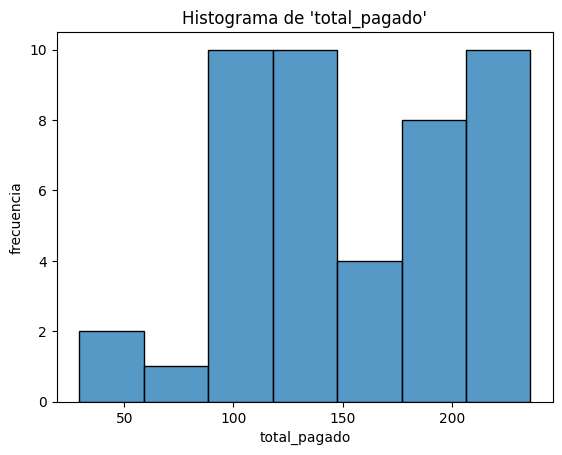

In [11]:
# creamos un histograma para la visualizar las frecuencias absolutas de la variable precio
sns.histplot(data=df_aux['total_pagado'])  # Ajustar bins según sea necesario
plt.title("Histograma de 'total_pagado'")
plt.xlabel('total_pagado')
plt.ylabel('frecuencia')
plt.show()

##### Medidas de centralización

No agruparemos los datos de la variable en tramos debido a la baja cantidad de observaciones, y para obtener los resultados con la mayor precisión posible.

In [12]:
# encontramos media 
media = df_aux['total_pagado'].mean()
print(media)

147.30888888888887


In [13]:
# encontramos mediana
mediana = df_aux['total_pagado'].median()
print(mediana)

135.0


In [14]:
# encontramos las modas
modas = df_aux['total_pagado'].mode()
print(modas)

0    118.0
1    236.0
Name: total_pagado, dtype: float64


Visualizamos los valores de concentración en el histograma de frecuencias anterior.

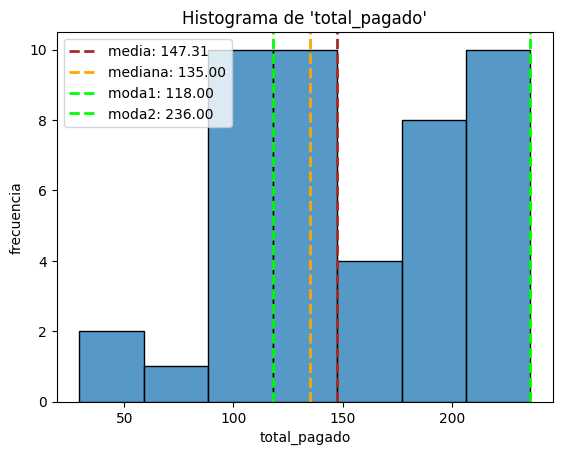

In [15]:
# creamos un histograma para la visualizar las frecuencias absolutas de la variable precio
plot = sns.histplot(df_aux['total_pagado'])
plot.set_title("Histograma de 'total_pagado'")
plot.set_xlabel('total_pagado')
plot.set_ylabel('frecuencia')

plot.axvline(media, color='brown', linestyle='dashed', linewidth=2, label=f'media: {media:.2f}')
plot.axvline(mediana, color='orange', linestyle='dashed', linewidth=2, label=f'mediana: {mediana:.2f}')
plot.axvline(modas[1], color='lime', linestyle='dashed', linewidth=2, label=f'moda1: {modas[0]:.2f}')
plot.axvline(modas[0], color='lime', linestyle='dashed', linewidth=2, label=f'moda2: {modas[1]:.2f}')

# añadir una leyenda
plt.legend()

Podemos observar que la *media* es ligeramente mas alta que la *mediana* con valores de *147.3 euros* y *135.0 euros* respectivamente. Debido a la sensibilidad de la media respecto a valores extremos esta diferencia probablemente exprese un desbalance hacia arriba de los datos, que lleven la media a elevarse.

A su vez podemos ver que tenemos dos modas: 118.0 euros y 236.0 euros, ambas con 8 ocurrencias. Esto quiere decir que son los importes pagados con mayor frecuencia. Casualmente 236.0 es un valor alejado en 101 euros de la mediana, explicando una de las razones por la que la media es más elevada que la mediana.

##### Medidas de disperción

In [16]:
# encontramos minimo y maximo
min = df_aux['total_pagado'].min()
max = df_aux['total_pagado'].max()
print(min)
print(max)

29.5
236.0


In [17]:
# encontramos varianza 
var = df_aux['total_pagado'].var()
print(var)

3356.593555555555


In [18]:
# encontramos desviacion standard
std = df_aux['total_pagado'].std()
print(std)

57.93611615871015


Obtenemos Coeficiente de Variación de Sperman, utilizando la siguiente definición:
$$
\begin{align*}
CV = \frac{\sigma}{\overline{x}}
\end{align*}
$$

In [19]:
# encontramos Coeficiente de Variación de Sperman
cv = std / media
print(cv)

0.39329681050279186


Vemos que la variable tiene un *recorrido de 206.5 euros*, que va de 29.5 a 236.5 euros. A su vez obtenemos un valor de *varianza de 3356.59*. Para ayudar en la interpretación obtenemos el valor de *desviación estandar de 57.9 euros*, que para una muestra con *media de 147.3 euros* expresa variabilidad moderada.

Para facilitar la interpretación de la variable, utilizamos el Coeficiente de Variación de Sperman, que pondera el valor de la desviación estandar, sobre el valor medio de la muestra. Esta medida de disperción no da un 39%, y como es menor a un 80%, podemos decir que la media aritmética es representativa de la muestra, y por lo tanto el conjunto de datos es homogeneo.

##### Medidas de posición

In [20]:
# obtenemos Q1 y Q3
q1 = df_aux['total_pagado'].quantile(0.25)
q3 = df_aux['total_pagado'].quantile(0.75)

# obtenemos rango intercuartílico
rq = q3 - q1

print(rq)

81.0


In [21]:
# obtenemos decil primero
d1 = df_aux['total_pagado'].quantile(0.10)
print(d1)

88.5


In [22]:
# obtenemos percentil 90
p90 = df_aux['total_pagado'].quantile(0.90)
print(p90)

236.0


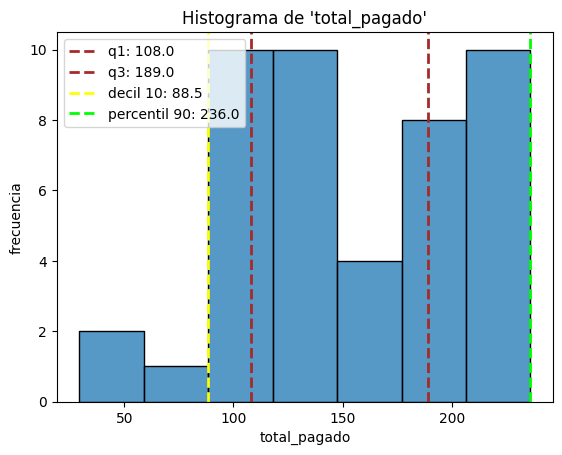

In [23]:
# creamos un histograma para la visualizar las frecuencias absolutas de la variable precio
plot = sns.histplot(df_aux['total_pagado'], bins=7)
plot.set_title("Histograma de 'total_pagado'")
plot.set_xlabel('total_pagado')
plot.set_ylabel('frecuencia')

plot.axvline(q1, color='brown', linestyle='dashed', linewidth=2, label=f'q1: {q1:.1f}')
plot.axvline(q3, color='brown', linestyle='dashed', linewidth=2, label=f'q3: {q3:.1f}')
plot.axvline(d1, color='yellow', linestyle='dashed', linewidth=2, label=f'decil 10: {d1:.1f}')
plot.axvline(p90, color='lime', linestyle='dashed', linewidth=2, label=f'percentil 90: {p90:.1f}')

# añadir una leyenda
plt.legend()

##### Medidas de concentración y forma

In [24]:
#importamos scipy
import scipy.stats as sci

#encontramos coeficiente de Asimetría de Fisher
coef_asimetria = sci.skew(df_aux['total_pagado'])
print(coef_asimetria)

0.09319685759185291


Podemos observar que un valor de 0.9 de coeficiente de asimetría nos indica una ligera asimetría positiva.

In [25]:
# encontramos coef de curtosis
coef_curtosis = sci.kurtosis(df_aux['total_pagado'])
print(coef_curtosis)

-0.8434624840832021


El resultado obtenido del estadístico indica que la distribución toma una forma **platicurtica**, es decir los valores estan dispersos respecto de la media.

Text(0.25, 29.5, 'Mín: 29.50')

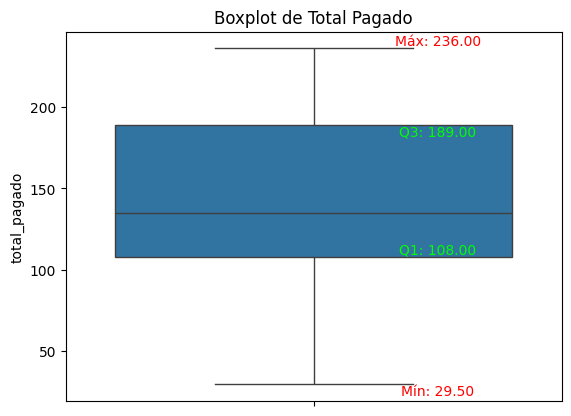

In [26]:
# creamos box-plot de la variable
sns.boxplot(df_aux['total_pagado'])

# añadimos título y etiquetas
plt.title('Boxplot de Total Pagado')

# añadimos etiquetas a los valores representativos
plt.text(0.25, q1, f'Q1: {q1:.2f}', ha='center', va='bottom', color='lime', fontsize=10)
plt.text(0.25, q3, f'Q3: {q3:.2f}', ha='center', va='top', color='lime', fontsize=10)

plt.text(0.25, max, f'Máx: {max:.2f}', ha='center', va='bottom', color='red', fontsize=10)
plt.text(0.25, min, f'Mín: {min:.2f}', ha='center', va='top', color='red', fontsize=10)


Podemos encontrar los limites teoricos de nuestros "bigotes" utilizando el rango intercuartil y con ello saber si tenemos o no outliers

In [27]:
iqr = q3 - q1
lim_inferior = q1 - 1.5 * iqr
lim_superior = q3 + 1.5 * iqr

print(lim_inferior)
print(lim_superior)

-13.5
310.5


En ambos casos limitados por los valores reales tomados por la variable

In [28]:
print(min)
print(max)

29.5
236.0


Podemos decir que no encontramos outliers en el dataset.

##### Análisis

La variable presenta una distribución con una *media de 143.3 euros*, ligeramente mas alta que la *mediana de 135.0*. La sensibilidad de la media respecto a valores extremos explica este desbalance hacia los valores mas altos del dataset. Los importes que mas se repiten son *118.0 euros y 236.0 euros*, quedando definidos como ambas *modas* con 8 ocurrencias. Casualmente 236.0 es a su vez valor máximo para la variable en la muestra.

La variable presenta un *rango de 206.5 euros*, oscilando entre 29.5 y 236.0 euros. También hemos calculado una *varianza de 3356.6*. Para facilitar la interpretación, calculamos una *desviación estándar de 57.9 euros*, que en relación con una *media de 147.3 euros*, indica una variabilidad moderada. Para interpretar mejor la dispersión de los datos, utilizamos el Coeficiente de Variación de Spearman, que relaciona la desviación estándar con la media de la muestra. Este coeficiente es del 39%, y dado que es menor al 80%, podemos afirmar que la media aritmética es representativa de la muestra, indicando que el conjunto de datos es homogéneo.

Un coeficiente de asimetría de 0.9 sugiere una ligera asimetría hacia la derecha en la distribución. El análisis de la curtosis muestra que la distribución es platicúrtica, lo que significa que los valores están más dispersos alrededor de la media. Tampoco encontramos valores outliers en el dataset.

Es importante destacar que el dataset contiene 45 observaciones y 10 variables diferentes, con baja variabilidad en cada uno de sus valores posibles. Esto se daba posiblemente a que contamos con un segmento pequeño de los datos totales, y los valores que toman no sean representativos de la operatoria real de la empresa. Probablemente si contasemos con mas datos, algunas apreciaciones hechas sería diferentes y las medidas recientemente obtenidas tomarian otros valores.

### Apartado 2

##### Cliente que ha pagado MÁS en todas las facturas.

Encontraremos el cliente que mas pagó dentro de los registros. Para saber si efectivamente el pago está realizado cotejamos la variable *factura_pagada*, es decir solo se contabilizarán las transacciones con dicho valor igual a 'si'.

In [29]:
# encontramos el ranking de clientes teniendo en cuenta la variable 'factura_pagada'
df_aux[df_aux['factura_pagada'] == 'si'].groupby('cliente')['total_pagado'].agg(['sum']).sort_values(by='sum', ascending=False)

,sum
cliente,
clienteA,1534.0
clienteD,1534.0
clienteB,924.0
clienteC,584.5


Podemos dos clientes con igual monto pagado dentro de los datos con los que se cuentan. *ClienteA* y *ClienteD* registraron un total de *1534.0 euros* pagados. Los siguen en montos *ClienteB* con *924.0 euros* y *ClienteC* con *584.5 euros* respectivamente.

Nos puede servir de referencia tener el total de facturas a cada cliente, aquí no estaremos considerando si la misma está o no pagada.

In [30]:
# encontramos el ranking de ventas totales sin contar pago de factura
df_aux.groupby('cliente')['total_pagado'].agg(['sum']).sort_values(by='sum', ascending=False)

,sum
cliente,
clienteA,2099.0
clienteD,2038.4
clienteB,1337.0
clienteC,1154.5


Observamos que siguen ambos, *ClienteA* y *ClienteD* liderando el ranking, con montos similares entre si, mientras que *ClienteB* y *ClienteC* mantienen los ultimos lugares.

#### Cliente que ha pagado MENOS facturas en el mes de febrero.

Para encontrar el cliente que menos facturas pagó en el mes de Febrero primero crearemos un dataframe auxiliar para operar de forma mas sencilla

In [31]:
# creamos un dataframe auxiliar
df_feb = df_aux[df_aux['mes'] == 'Febrero'].copy()
df_feb

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
31,32,01/02/2010,Febrero,clienteC,no,150,normal,18,27.0,177.0
32,33,02/02/2010,Febrero,clienteD,si,75,normal,18,13.5,88.5
33,34,03/02/2010,Febrero,clienteA,si,200,normal,18,36.0,236.0
34,35,04/02/2010,Febrero,clienteB,si,125,normal,18,22.5,147.5
35,36,05/02/2010,Febrero,clienteC,no,100,reducido,8,8.0,108.0
36,37,06/02/2010,Febrero,clienteD,si,175,normal,18,31.5,206.5
37,38,07/02/2010,Febrero,clienteA,si,100,normal,18,18.0,118.0
38,39,08/02/2010,Febrero,clienteA,si,150,normal,18,27.0,177.0
39,40,09/02/2010,Febrero,clienteB,si,75,normal,18,13.5,88.5
40,41,10/02/2010,Febrero,clienteD,si,200,normal,18,36.0,236.0


In [32]:
# creamos un dataframe auxiliar
facturado = df_feb.groupby('cliente')['total_pagado'].agg(['sum', 'count'])
facturado

,sum,count
cliente,,
clienteA,666.0,4
clienteB,295.0,3
clienteC,314.5,3
clienteD,563.4,4


In [33]:
# creamos un dataframe auxiliar
pagado = df_feb[df_feb['factura_pagada'] == 'si'].groupby('cliente')['total_pagado'].agg(['sum', 'count'])
pagado


,sum,count
cliente,,
clienteA,531.0,3
clienteB,236.0,2
clienteC,29.5,1
clienteD,531.0,3


In [34]:
# creamos un dataframe auxiliar
clientes_feb =  pd.DataFrame({
    'facturado': facturado['sum'],
    'pagado': pagado['sum'],
    'deuda': facturado['sum'] - pagado['sum'],
    'tasa_pagado': pagado['sum']/facturado['sum'],
    'tx_totales': facturado['count'],
    'tx_pagadas': pagado['count'],
    'tasa_tx': pagado['count']/facturado['count']
})
clientes_feb.sort_values(by='tasa_pagado')

,facturado,pagado,deuda,tasa_pagado,tx_totales,tx_pagadas,tasa_tx
cliente,,,,,,,
clienteC,314.5,29.5,285.0,0.093800,3,1,0.333333
clienteA,666.0,531.0,135.0,0.797297,4,3,0.750000
clienteB,295.0,236.0,59.0,0.800000,3,2,0.666667
clienteD,563.4,531.0,32.4,0.942492,4,3,0.750000


In [35]:
# describimos la variable tasa de pagado
clientes_feb['tasa_pagado'].describe()

count    4.000000
mean     0.658397
std      0.382459
min      0.093800
25%      0.621423
50%      0.798649
75%      0.835623
max      0.942492
Name: tasa_pagado, dtype: float64

En el análisis anterior lo hacemos sabiendo que solo se cuentan con observaciones de entre el 2010-01-01 y 2010-02-14, por lo que utilizar la variable 'mes' de tipo categoríca para agrupar las transacciones.

Es el *Cliente C* el que registra mayor adeudamiento con la empresa, ya que de un total de *314.5 euros* que compró, solo pagó *29.5*, lo que representa un 9.38% de la deuda total contraida. Si tenemos en cuenta el números de transacciones que se realizaron, tambien es el *ClienteC* el que mayor porcentaje debe, con un total de 66.6% de deuda aun activa, en un total de 3 transacciones totales para el mes de Febrero.

Text(0.5, 1.0, 'Boxplot de Total Pagado')

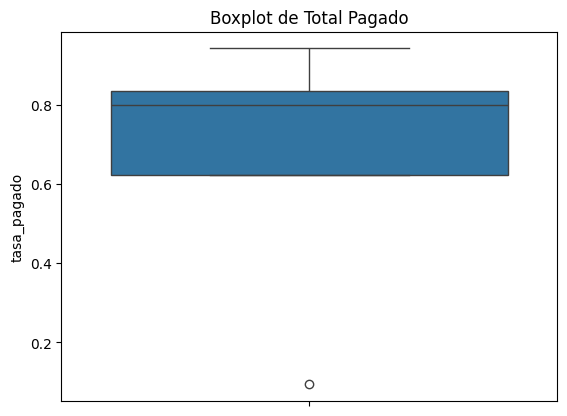

In [36]:
# creamos box-plot de la variable
sns.boxplot(clientes_feb['tasa_pagado'])

# añadimos título y etiquetas
plt.title('Boxplot de Total Pagado')

Podemos observar que el valor del porcentaje de pago del Cliente C se expresa como un outlier en nuestro box-plot. 

#### Análisis y recomendaciones
Los clientes: ClienteA y ClienteD resultaron ser los de mayores compras dentro del set de datos con el que contamos. Teniendo un importe total pagado de 1534.0 euros cada uno. El ClienteD resulta en una deuda menor debido a que registra de una deuda total de *2038.4 euros*, frente a los *2099.0 euros* del ClienteA.

A su vez el ClienteC, es el más moroso durante el mes de febrero, registrando un total de *285.0 euros* adeudados, representando una mora del 90.62%. Y habiendo solamente pagado 1 de las 3 facturas que se le realizaron.

Se recomienda iniciar gestiones de cobranza con el ClienteC.

### Apartado 3

Text(0, 0.5, 'IVA')

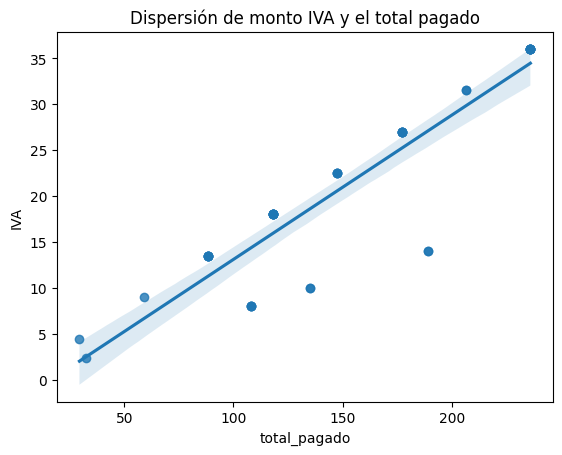

In [37]:
# creamos 
sns.regplot(x='total_pagado', y='IVA', data=df_aux)

# añadimos título y etiquetas
plt.title("Dispersión de monto IVA y el total pagado")
plt.xlabel("total_pagado")
plt.ylabel("IVA")

Como dijimos anteriormente contamos solamente con 12 montos diferentes para la variable 'total_pagado' en el set de datos con el que contamos. Cada uno de ellos se puede ver en el diagrama de disperción anterior. A su vez, cada uno de ellos con un valor de IVA correspondiente, que van de 2.4 euros hasta 36.0 euros.

Se puede apreciar un relación directa entre ambas variables, dado que a medida que aumenta el monto pagado, tambien aumenta el monto de IVA.

In [38]:
df_cov = df_aux[['total_pagado', 'IVA']].copy()
df_cov.cov()

,total_pagado,IVA
total_pagado,3356.593556,526.768808
IVA,526.768808,100.529919


Vemos que la covarianza para las variables *total_pagado* e *IVA* es de *526.7*, lo que representa una dependencia directa (positiva). Es decir a medida que aumentan los valores de una variable, tambien lo hacen los valores de la otra.

Teniendo en cuenta que el gráfico de disperción nos muestra una relacion linean entre las variables, y la covarianza es positiva indicando una relación directa entre las mismas, podemos sugerir un modelo predictivo utilizando una linea recta de pendiente positiva.

### Apartado 4

Los datos observados corresponden a un volumen demasiado pequeño para obtener definiciones absolutas. Aún así nos permite ver el comportamiento aparente de sus variables. Por ejemplo, el total de facturación reporta una media de 143.3 euros, una mediana ligeramente menor de 135.0 euros, y dos modas una a cada lado de la media. Además posee una ligera asimetria hacia la derecha en su distribución, con un coeficiente de asimetría del 0.9. Mientras que el análisis de la curtosis muestra una distribución platicurtica.

En cuanto al estado de las cuentas de los clientes para el mes de febrero notamos baja mora general con una tasa de pago del 65%. Y con la menor proporción de pago del ClienteC con un 9.38% pagado sobre el total de la deuda. Se sugieren iniciar acciones de cobro contra dicho cliente.

De igual manera se obtuvo una relación lineal positiva entre las variables 'total_pagado' e 'iva', lo que puede llevar a sugerir el uso de un metodo predictivo mediante la aproximación de la función a una recta cuya pendiente es positiva.